# **STATISTICAL MODEL**

## ABOUT THE DATASET (IXI- DATASET)

In this project we have collected nearly 600 MR images from normal, healthy subjects. The MR image acquisition protocol for each subject includes T1 Images

The data has been collected at three different hospitals in London:

    Hammersmith Hospital using a Philips 3T system (details of scanner parameters)
    Guy’s Hospital using a Philips 1.5T system (details of scanner parameters)
    Institute of Psychiatry using a GE 1.5T system (details of the scan parameters not available at the moment)

The data has been collected as part of the project:
IXI – Information eXtraction from Images (EPSRC GR/S21533/02)

Reference Link - https://brain-development.org/ixi-dataset/


# METHODS
- [Linear Regression](#linear-regression)
- [Polynomial Regression](#polynomial-regression)
- [Quantile Mapping](#quantile-mapping)

# Linear Regression

In [1]:
# #ADNI
# file_HH = r'New folder\1.5T.nii'
# file_GH = r'New folder\3T.nii' 

In [2]:
# IXI DATASET
file_HH = 'IXI-T1\IXI012-HH-1211-T1.nii.gz'
file_GH = 'IXI-T1\IXI002-Guys-0828-T1.nii.gz' 

In [3]:
import nibabel as nib
import scipy.ndimage as ndi

contents_HH = nib.load(file_HH)
contents_GH = nib.load(file_GH)

In [4]:
import numpy as np

# Get the image data as NumPy arrays
data_3T = contents_HH.get_fdata()
data_1_5T = contents_GH.get_fdata()

In [7]:
data_3T.reshape(data_1_5T.shape)

ValueError: cannot reshape array of size 5898240 into shape (256,256,170)

In [6]:
data_1_5T.shape

(256, 256, 170)

In [8]:
data_3T_1D = data_3T.reshape(-1,1)
data_1_5T_1D = data_1_5T.reshape(-1,1)

ValueError: cannot reshape array of size 5898240 into shape (11141120,1)

In [5]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(data_3T_1D, data_1_5T_1D)


ValueError: Found input variables with inconsistent numbers of samples: [5898240, 11141120]

In [7]:
normalized_data_3T_1D = regression_model.predict(data_3T_1D)

In [8]:
normalized_img = normalized_data_3T_1D.reshape(data_3T.shape)

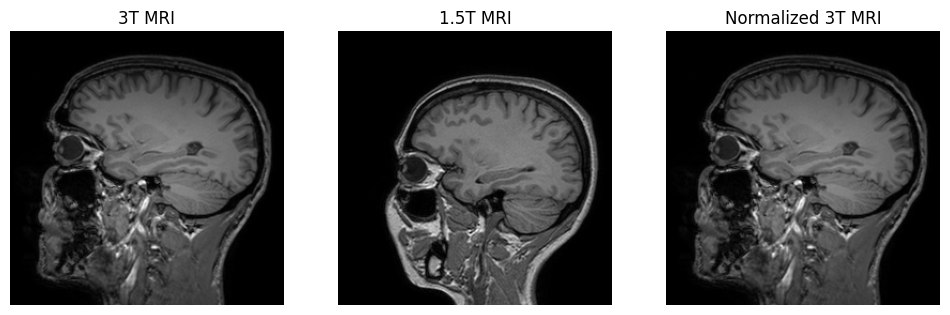

In [9]:
import matplotlib.pyplot as plt

slice_index = 100
# Display the original 3T and 1.5T images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ndi.rotate(data_3T[:, :,100],90), cmap='gray', aspect='equal')
plt.title('3T MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ndi.rotate(data_1_5T[:, :, slice_index],90), cmap='gray', aspect='equal')
plt.title('1.5T MRI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ndi.rotate(normalized_img[:, :, slice_index],90), cmap='gray', aspect='equal')
plt.title('Normalized 3T MRI')
plt.axis('off')

plt.show()

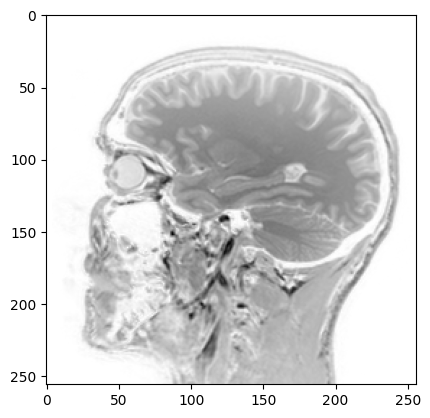

In [10]:
check = normalized_img[:,:,100] - data_3T[:,:,100]
plt.imshow(ndi.rotate(check,90),cmap='gray')

## POLYNOMIAL REGRESSION

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data_3T_1D)  # Transform the features to polynomial features
model = LinearRegression()
model.fit(X_poly, data_1_5T_1D)  # Fit linear regression to the polynomial features
harmonized_data = model.predict(X_poly)


In [12]:
harmonized_img = harmonized_data.reshape(data_3T.shape)

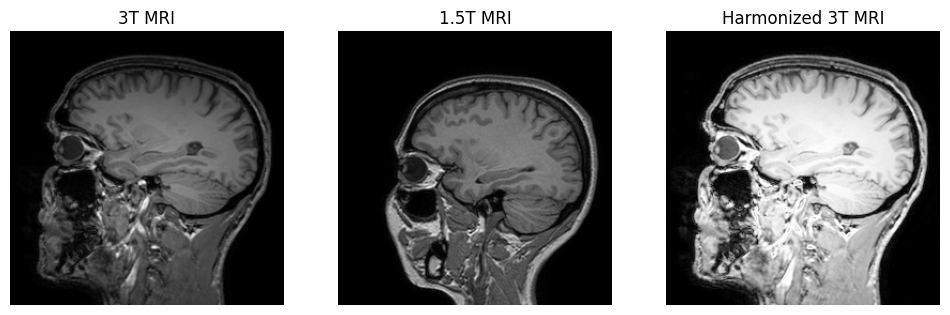

In [13]:
import matplotlib.pyplot as plt

slice_index = 100
# Display the original 3T and 1.5T images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ndi.rotate(data_3T[:, :,100],90), cmap='gray', aspect='equal')
plt.title('3T MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ndi.rotate(data_1_5T[:, :, slice_index],90), cmap='gray', aspect='equal')
plt.title('1.5T MRI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ndi.rotate(harmonized_img[:, :, slice_index],90), cmap='gray', aspect='equal')
plt.title('Harmonized 3T MRI')
plt.axis('off')

plt.show()

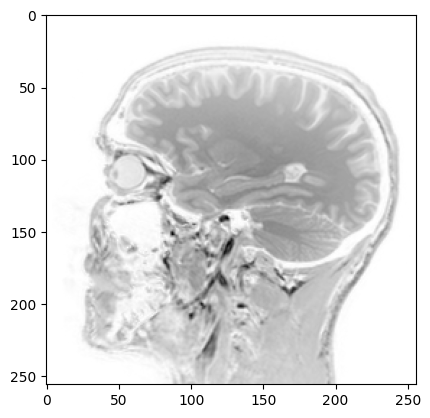

In [14]:
check = harmonized_img[:,:,100] - data_3T[:,:,100]
plt.imshow(ndi.rotate(check,90),cmap='gray')

## QUANTILE MAPPING

In [15]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='uniform')
Quantile_3T_transformed = quantile_transformer.fit_transform(data_3T_1D)


In [16]:
Quantile_img = Quantile_3T_transformed.reshape(data_3T.shape)

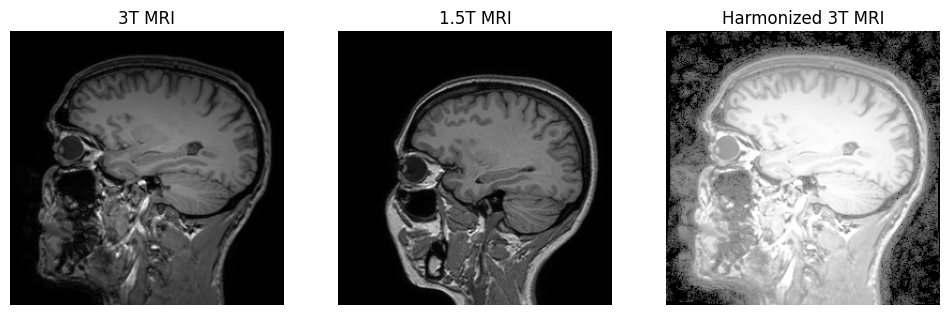

In [17]:
import matplotlib.pyplot as plt

slice_index = 100
# Display the original 3T and 1.5T images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ndi.rotate(data_3T[:, :,100],90), cmap='gray', aspect='equal')
plt.title('3T MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ndi.rotate(data_1_5T[:, :, slice_index],90), cmap='gray', aspect='equal')
plt.title('1.5T MRI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ndi.rotate(Quantile_img[:, :, slice_index],90), cmap='gray', aspect='equal')
plt.title('Harmonized 3T MRI')
plt.axis('off')

plt.show()

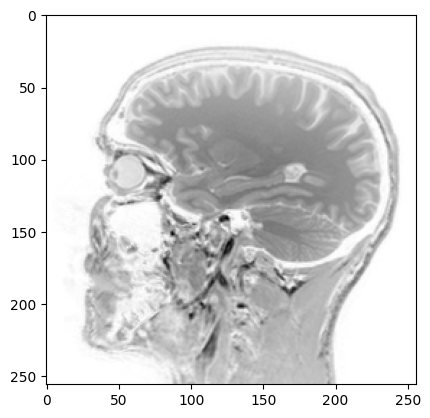

In [18]:
check = Quantile_img[:,:,100] - data_3T[:,:,100]
plt.imshow(ndi.rotate(check,90),cmap='gray')